<div style="position:relative;">
<img src=images/pandas_badge2.jpg style="width: 60px; float: left" />
</div>
<div style="position:relative;">
<img src=images/pandas_badge2.jpg style="width: 60px; float: right" />
</div>

# &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; Pandas


**pandas** provides high-performance easy-to-use data structures and data-analysis tools.


The API is heavily influenced by the programming language **R**.

In [1]:
import pandas as pd

In [2]:
import numpy as np
import scipy.stats
%matplotlib inline
import matplotlib.pyplot as plt

## Series and DataFrames

The basic building blocks in **pandas** are
  * `pd.Series` a one-dimensional labeled array capable of holding any data type
  * `pd.DataFrame` a two-dimensional labeled array with columns of potentially different data types.

In [25]:
series = pd.Series([3, 1, 4, 1, 5, 9, 2, 6], name='DigitsOfPi')
series

0    3
1    1
2    4
3    1
4    5
5    9
6    2
7    6
Name: DigitsOfPi, dtype: int64

In [31]:
df = pd.DataFrame({'PrimeNumbers': [2, 3, 5, 7, 11, 13, 17, 19],
                   'FibonacciNumbers': [0, 1, 1, 2, 3, 5, 8, 13],
                   'Alphabet': ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h']})
df

,Alphabet,FibonacciNumbers,PrimeNumbers
0,a,0,2
1,b,1,3
2,c,1,5
3,d,2,7
4,e,3,11
5,f,5,13
6,g,8,17
7,h,13,19


## Data Indexing & Selection

Very powerful!

There are endless possibilities to index and select data.
Even hierarchical indexes are possible.

You can select along two axes:
  * The index (usually a range of numbers, strings or timestamps)
  * The columns (usually strings)
  
http://pandas.pydata.org/pandas-docs/stable/indexing.html

In [10]:
df.columns

Index(['Alphabet', 'FibonacciNumbers', 'PrimeNumbers'], dtype='object')

In [11]:
df.index

RangeIndex(start=0, stop=8, step=1)

### Examples: Selecting one column

In [13]:
df['PrimeNumbers']

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
Name: PrimeNumbers, dtype: int64

In [14]:
df.PrimeNumbers

0     2
1     3
2     5
3     7
4    11
5    13
6    17
7    19
Name: PrimeNumbers, dtype: int64

### Examples: Selecting multiple columns

In [15]:
df[['PrimeNumbers', 'Alphabet']]

,PrimeNumbers,Alphabet
0,2,a
1,3,b
2,5,c
3,7,d
4,11,e
5,13,f
6,17,g
7,19,h


### Examples: Selecting on index

In [18]:
df.loc[1]

Alphabet            b
FibonacciNumbers    1
PrimeNumbers        3
Name: 1, dtype: object

In [19]:
df.loc[3:6]

,Alphabet,FibonacciNumbers,PrimeNumbers
3,d,2,7
4,e,3,11
5,f,5,13
6,g,8,17


### Examples: Selecting on column and index

In [21]:
df.loc[[1,4,6], ['Alphabet', 'PrimeNumbers']]

,Alphabet,PrimeNumbers
1,b,3
4,e,11
6,g,17


### Examples: Selecting using a boolean mask

In [22]:
df[df.PrimeNumbers < 10]

,Alphabet,FibonacciNumbers,PrimeNumbers
0,a,0,2
1,b,1,3
2,c,1,5
3,d,2,7


## Relation to numpy ndarray

The Data-structures are:
  * build on top of **NumPy** `np.ndarray`s
  * behave in many aspects like `np.ndarray`s
  * column-based (column-wise operations are a lot faster than row-wise)

In [23]:
df.values

array([['a', 0, 2],
       ['b', 1, 3],
       ['c', 1, 5],
       ['d', 2, 7],
       ['e', 3, 11],
       ['f', 5, 13],
       ['g', 8, 17],
       ['h', 13, 19]], dtype=object)

In [24]:
df.PrimeNumbers + df.FibonacciNumbers

0     2
1     4
2     6
3     9
4    14
5    18
6    25
7    32
dtype: int64

## Data Manipulation

In [32]:
df['DigitsOfPi'] = series
df.head()

,Alphabet,FibonacciNumbers,PrimeNumbers,DigitsOfPi
0,a,0,2,3
1,b,1,3,1
2,c,1,5,4
3,d,2,7,1
4,e,3,11,5


In [34]:
df.loc[9] = ['j', 34, 29, 3]
df.tail()

,Alphabet,FibonacciNumbers,PrimeNumbers,DigitsOfPi
4,e,3,11,5
5,f,5,13,9
6,g,8,17,2
7,h,13,19,6
9,j,34,29,3


## Missing Data

Pandas can handle missing data and will (in contrast to numpy) mostly ignore it during caluclations.

In [35]:
df.loc[8, ['Alphabet', 'DigitsOfPi']] = ['i', 5]
df.tail()

,Alphabet,FibonacciNumbers,PrimeNumbers,DigitsOfPi
5,f,5.0,13.0,9.0
6,g,8.0,17.0,2.0
7,h,13.0,19.0,6.0
9,j,34.0,29.0,3.0
8,i,NaN,NaN,5.0


## Descriptive statistics

Pandas contains many methods to do descriptive statistics.

One of the most useful methods is `pd.DataFrame.describe`.

In [36]:
df.describe()

,FibonacciNumbers,PrimeNumbers,DigitsOfPi
count,9.000000,9.000000,10.000000
mean,7.444444,11.777778,3.900000
std,10.783217,8.800253,2.469818
min,0.000000,2.000000,1.000000
25%,1.000000,5.000000,2.250000
50%,3.000000,11.000000,3.500000
75%,8.000000,17.000000,5.000000
max,34.000000,29.000000,9.000000


In [37]:
df['Alphabet'].sum()

'abcdefghji'

In [47]:
df.DigitsOfPi.value_counts()

5.0    2
3.0    2
1.0    2
9.0    1
6.0    1
4.0    1
2.0    1
Name: DigitsOfPi, dtype: int64

## Visualization

Pandas defines powerful plotting mechanisms based on **matplotlib**

http://pandas.pydata.org/pandas-docs/stable/visualization.html

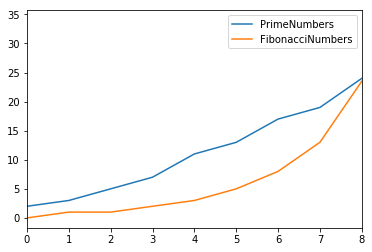

In [40]:
df[['PrimeNumbers', 'FibonacciNumbers']].plot()

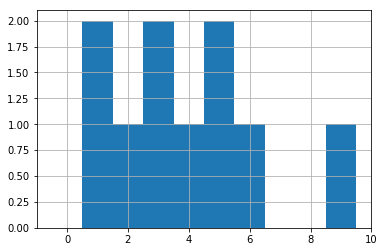

In [46]:
df['DigitsOfPi'].hist(bins=10, range=(-0.5, 9.5))

## DataMining Example: Twitter History of @realDonaldTrump

Pandas is a great tool to do data mining.

On this example we will learn some more advanced techniques.

In [48]:
df = pd.read_csv('realdonaldtrump.csv', parse_dates=[5])
df.head()

,favorite_count,source,text,in_reply_to_screen_name,is_retweet,created_at,retweet_count,id_str
0,17198,Twitter for Android,"""@zhu_amy3: @realDonaldTrump It's Morning in A...",NaN,True,2017-01-12 04:24:52,3510,819399723924803585
1,47078,Twitter for Android,We had a great News Conference at Trump Tower ...,NaN,False,2017-01-12 04:01:38,13591,819393877174087682
2,51040,Twitter for Android,Intelligence agencies should never have allowe...,NaN,False,2017-01-11 12:48:52,17733,819164172781060096
3,51673,Twitter for Android,"I win an election easily, a great ""movement"" i...",NaN,False,2017-01-11 12:44:05,15037,819162968592183298
4,42993,Twitter for Android,Russia has never tried to use leverage over me...,NaN,False,2017-01-11 12:31:31,14087,819159806489591809


## DatetimeIndex

Working with Dates can be error-prone, due to the different formats and time-zones.

We assume that the original time by twitter was given by the universal time UTC,
and we localize it to US/Eastern, which is the timezone of New York.

In [49]:
times = pd.DatetimeIndex(df.created_at).tz_localize('utc').tz_convert('US/Eastern')
df['year'] = times.year
df['month'] = times.month
df['day'] = times.day
df['hour'] = times.hour
df['minute'] = times.minute
df['dayofweek'] = times.dayofweek
df['dayofyear'] = times.dayofyear
df['weekofyear'] = times.weekofyear

df.columns

Index(['favorite_count', 'source', 'text', 'in_reply_to_screen_name',
       'is_retweet', 'created_at', 'retweet_count', 'id_str', 'year', 'month',
       'day', 'hour', 'minute', 'dayofweek', 'dayofyear', 'weekofyear'],
      dtype='object')

### [Sleep|Tweet]ing Pattern of Donald J. Trump

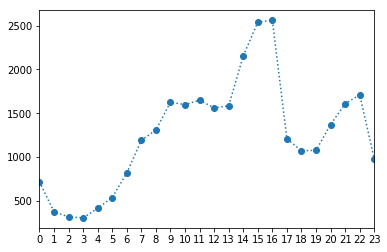

In [69]:
df['hour'].value_counts().sort_index().plot(marker='o', ls='dotted', xticks=np.arange(24))

## Group-By

One of the most powerful techniques is the Group-By mechanism of **pandas**
  * **Splitting** the data into groups based on some criteria
  * **Applying** a function to each group independently
  * **Combining** the results into a data structure
  
This works similar to the GROUP BY statement of SQL databases.

It is also possible to do SQL like JOINS.

In [111]:
df.groupby('source')['id_str'].count().sort_values()

source
Media Studio                    1
Twitter for Websites            1
Twitter Mirror for iPad         1
Neatly For BlackBerry 10        5
Periscope                       7
Vine - Make a Scene            10
Twitter QandA                  10
Twitter for iPad               22
Twitlonger                     23
Mobile Web (M5)                56
Twitter Ads                    64
Twitter for BlackBerry         97
Facebook                      105
Instagram                     133
TwitLonger Beta               405
TweetDeck                     483
Twitter for iPhone           2399
Twitter Web Client          12128
Twitter for Android         14331
Name: id_str, dtype: int64

In [61]:
favorit_devices = _.index[-3:]

### A more advanced group by example
  * Selecting a subset of interest
  * Groupby on multiple columns
  * Aggregating by counting the number of entries/tweets
  * Creating a pivot table
  * Viszualization

#### Select

In [113]:
subset = df[df.source.isin(favorit_devices)]
subset.source.unique()

array(['Twitter for Android', 'Twitter for iPhone', 'Twitter Web Client'], dtype=object)

#### Groupby and Aggregate

In [117]:
count = subset.groupby(['source', 'hour'])['id_str'].count()
count.head()

source              hour
Twitter Web Client  0       3
                    1       2
                    3       1
                    4       4
                    6       1
Name: id_str, dtype: int64

#### Pivot

In [120]:
pivot = count.reset_index().pivot('hour', 'source', values='id_str')
pivot.head()

source,Twitter Web Client,Twitter for Android,Twitter for iPhone
hour,,,
0,3.0,641.0,71.0
1,2.0,327.0,43.0
2,NaN,314.0,3.0
3,1.0,301.0,2.0
4,4.0,409.0,1.0


#### Visualization

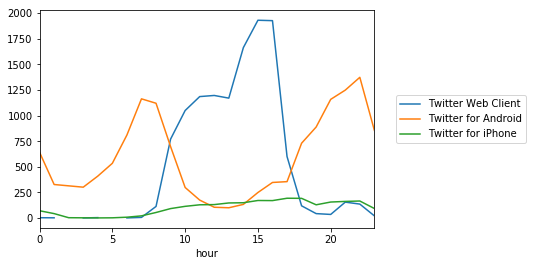

In [121]:
pivot.plot()
plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))

## Text Mining

We do some text mining and look for Trump's favorit words

In [108]:
favorit_words = ['stupid', '[L|l]oser', '[M|m]oron']
subset[subset.text.str.contains('|'.join(favorit_words))].source.value_counts()

Twitter for Android    162
Twitter Web Client     144
Twitter for iPhone       5
Name: source, dtype: int64

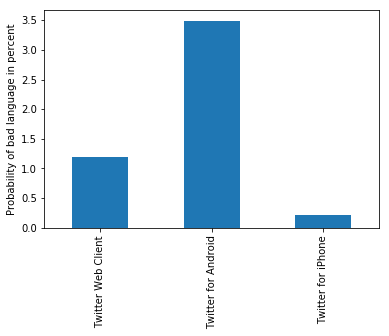

In [109]:
(_ / subset.source.value_counts() * 100).plot.bar()
plt.ylabel('Probability of bad language in percent')

### Average tweet length per device

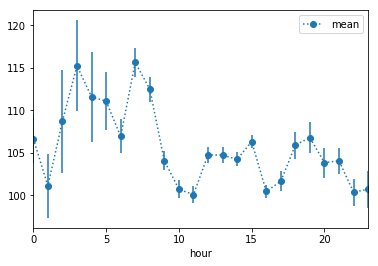

In [122]:
df['tweet_length'] = df.text.str.len()
subset = df[~df.is_retweet & df.source.isin(favorit_devices)]
tweet_length = subset.groupby('hour')['tweet_length'].agg([np.mean, np.std, len])
tweet_length['mean_error'] = tweet_length['std'] / np.sqrt(tweet_length['len'])
tweet_length.plot(y='mean', yerr='mean_error', marker='o', ls='dotted')

## Exercise 

#### Task 1:

What is the maximum number of (original) tweets Donald managed to perform in one hour?
What was the content of these messages?


#### Task 2:

Investigate the ratio between *retweets* and *original content* in relation to the used devices.
Which device does Donald use to *retweet*, which one to write down *original content / ideas*.


#### Task 3:

Find evidence for the hypothesis that the messages from "Twitter for iPhone" are NOT coming from Donald J. Trump.
